## 1.기존의 프로그램 방식

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 섭씨온도(인풋데이터)를 받아 화씨온도로 출력
def celsisu_to_faherenheit(c):
    return c*1.8+32

In [6]:
input_c=int(input("섭씨온도는?"))
print("화씨온도는",celsisu_to_faherenheit(input_c))

섭씨온도는?30
화씨온도는 86.0


# 2. 머신러닝 프로그램 방식
- 1.데이터 확보 및 생성
- 2.데이터 전처리:훈련데이터셋(학습데이터셋),검증데이터셋,시험데이터셋,....
- 3.모델(식) 구성
- 4.모델 학습과정 설정
- 5.모델 학습시키기
- 6.모델 평가((시험 데이터셋으로
- 7.모델 사용(입력값을 주어지면 예측값을 받기_

In [4]:
#1.데이터 확보 및 생성
data_C=np.array(range(100))
data_C #독립변수인 아이

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
data_F=celsisu_to_faherenheit(data_C)
data_F #타겟변수

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [6]:
#3. 모델 구성
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense #입력값과 출력값
#>>> [ ]레이어 >>>>
model=Sequential()
model.add(Dense(1,input_dim=1)) #독립변수가 1개(input_dim=1)

In [7]:
#4.모델 학습 과정 설정
model.compile(loss="mse",optimizer="rmsprop",metrics=["mae"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
#학습전 예측
model.predict(np.array([[0]]))

array([[0.]], dtype=float32)

In [9]:
model.save("model/before_learning.h5")

In [10]:
#5.학습 시키기(0~99,32~200) 스케일을 먼저 맞쳐주자
# 2,데이터 전처리:컴퓨터에게 학습시키기 위해 normalize함(전체의 편차를 비슷하게
# 이상적인 편차 0~1)
scaled_data_C=data_C/100.0
scaled_data_F=data_F/100.0
print("독립 변수는",scaled_data_C)
print("다겟 변수는",scaled_data_F)

독립 변수는 [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
다겟 변수는 [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.7

In [11]:
# 모델 학습시키기
hist=model.fit(scaled_data_C,scaled_data_F,epochs=1000,verbose=2)
#독립 변수(훈련데이터) 티겟변수(훈련 data_ 학습횟수)

Epoch 1/1000
4/4 - 0s - loss: 1.7889 - mae: 1.2274
Epoch 2/1000
4/4 - 0s - loss: 1.7624 - mae: 1.2175
Epoch 3/1000
4/4 - 0s - loss: 1.7422 - mae: 1.2098
Epoch 4/1000
4/4 - 0s - loss: 1.7234 - mae: 1.2026
Epoch 5/1000
4/4 - 0s - loss: 1.7067 - mae: 1.1961
Epoch 6/1000
4/4 - 0s - loss: 1.6897 - mae: 1.1896
Epoch 7/1000
4/4 - 0s - loss: 1.6731 - mae: 1.1831
Epoch 8/1000
4/4 - 0s - loss: 1.6581 - mae: 1.1774
Epoch 9/1000
4/4 - 0s - loss: 1.6414 - mae: 1.1707
Epoch 10/1000
4/4 - 0s - loss: 1.6264 - mae: 1.1649
Epoch 11/1000
4/4 - 0s - loss: 1.6129 - mae: 1.1595
Epoch 12/1000
4/4 - 0s - loss: 1.5982 - mae: 1.1537
Epoch 13/1000
4/4 - 0s - loss: 1.5821 - mae: 1.1472
Epoch 14/1000
4/4 - 0s - loss: 1.5670 - mae: 1.1412
Epoch 15/1000
4/4 - 0s - loss: 1.5527 - mae: 1.1354
Epoch 16/1000
4/4 - 0s - loss: 1.5383 - mae: 1.1295
Epoch 17/1000
4/4 - 0s - loss: 1.5237 - mae: 1.1235
Epoch 18/1000
4/4 - 0s - loss: 1.5102 - mae: 1.1181
Epoch 19/1000
4/4 - 0s - loss: 1.4958 - mae: 1.1121
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.2266 - mae: 0.3893
Epoch 159/1000
4/4 - 0s - loss: 0.2221 - mae: 0.3855
Epoch 160/1000
4/4 - 0s - loss: 0.2176 - mae: 0.3819
Epoch 161/1000
4/4 - 0s - loss: 0.2133 - mae: 0.3782
Epoch 162/1000
4/4 - 0s - loss: 0.2107 - mae: 0.3760
Epoch 163/1000
4/4 - 0s - loss: 0.2071 - mae: 0.3730
Epoch 164/1000
4/4 - 0s - loss: 0.2033 - mae: 0.3698
Epoch 165/1000
4/4 - 0s - loss: 0.1989 - mae: 0.3659
Epoch 166/1000
4/4 - 0s - loss: 0.1953 - mae: 0.3629
Epoch 167/1000
4/4 - 0s - loss: 0.1915 - mae: 0.3595
Epoch 168/1000
4/4 - 0s - loss: 0.1879 - mae: 0.3566
Epoch 169/1000
4/4 - 0s - loss: 0.1840 - mae: 0.3531
Epoch 170/1000
4/4 - 0s - loss: 0.1801 - mae: 0.3496
Epoch 171/1000
4/4 - 0s - loss: 0.1775 - mae: 0.3474
Epoch 172/1000
4/4 - 0s - loss: 0.1748 - mae: 0.3448
Epoch 173/1000
4/4 - 0s - loss: 0.1719 - mae: 0.3423
Epoch 174/1000
4/4 - 0s - loss: 0.1687 - mae: 0.3395
Epoch 175/1000
4/4 - 0s - loss: 0.1651 - mae: 0.3362
Epoch 176/1000
4/4 - 0s - loss: 0.1615 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0424 - mae: 0.1778
Epoch 314/1000
4/4 - 0s - loss: 0.0420 - mae: 0.1769
Epoch 315/1000
4/4 - 0s - loss: 0.0418 - mae: 0.1763
Epoch 316/1000
4/4 - 0s - loss: 0.0415 - mae: 0.1758
Epoch 317/1000
4/4 - 0s - loss: 0.0412 - mae: 0.1751
Epoch 318/1000
4/4 - 0s - loss: 0.0408 - mae: 0.1745
Epoch 319/1000
4/4 - 0s - loss: 0.0405 - mae: 0.1736
Epoch 320/1000
4/4 - 0s - loss: 0.0401 - mae: 0.1729
Epoch 321/1000
4/4 - 0s - loss: 0.0397 - mae: 0.1720
Epoch 322/1000
4/4 - 0s - loss: 0.0393 - mae: 0.1713
Epoch 323/1000
4/4 - 0s - loss: 0.0390 - mae: 0.1705
Epoch 324/1000
4/4 - 0s - loss: 0.0386 - mae: 0.1696
Epoch 325/1000
4/4 - 0s - loss: 0.0383 - mae: 0.1687
Epoch 326/1000
4/4 - 0s - loss: 0.0379 - mae: 0.1680
Epoch 327/1000
4/4 - 0s - loss: 0.0375 - mae: 0.1673
Epoch 328/1000
4/4 - 0s - loss: 0.0372 - mae: 0.1664
Epoch 329/1000
4/4 - 0s - loss: 0.0369 - mae: 0.1657
Epoch 330/1000
4/4 - 0s - loss: 0.0366 - mae: 0.1650
Epoch 331/1000
4/4 - 0s - loss: 0.0363 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.0036 - mae: 0.0519
Epoch 469/1000
4/4 - 0s - loss: 0.0035 - mae: 0.0511
Epoch 470/1000
4/4 - 0s - loss: 0.0034 - mae: 0.0505
Epoch 471/1000
4/4 - 0s - loss: 0.0034 - mae: 0.0497
Epoch 472/1000
4/4 - 0s - loss: 0.0033 - mae: 0.0492
Epoch 473/1000
4/4 - 0s - loss: 0.0032 - mae: 0.0484
Epoch 474/1000
4/4 - 0s - loss: 0.0031 - mae: 0.0478
Epoch 475/1000
4/4 - 0s - loss: 0.0030 - mae: 0.0470
Epoch 476/1000
4/4 - 0s - loss: 0.0029 - mae: 0.0463
Epoch 477/1000
4/4 - 0s - loss: 0.0028 - mae: 0.0456
Epoch 478/1000
4/4 - 0s - loss: 0.0027 - mae: 0.0449
Epoch 479/1000
4/4 - 0s - loss: 0.0027 - mae: 0.0442
Epoch 480/1000
4/4 - 0s - loss: 0.0025 - mae: 0.0435
Epoch 481/1000
4/4 - 0s - loss: 0.0025 - mae: 0.0428
Epoch 482/1000
4/4 - 0s - loss: 0.0024 - mae: 0.0420
Epoch 483/1000
4/4 - 0s - loss: 0.0023 - mae: 0.0414
Epoch 484/1000
4/4 - 0s - loss: 0.0022 - mae: 0.0407
Epoch 485/1000
4/4 - 0s - loss: 0.0021 - mae: 0.0401
Epoch 486/1000
4/4 - 0s - loss: 0.0021 - mae: 

Epoch 610/1000
4/4 - 0s - loss: 7.5508e-07 - mae: 8.5391e-04
Epoch 611/1000
4/4 - 0s - loss: 6.0621e-07 - mae: 7.5967e-04
Epoch 612/1000
4/4 - 0s - loss: 4.0707e-07 - mae: 6.2694e-04
Epoch 613/1000
4/4 - 0s - loss: 4.6244e-07 - mae: 6.6139e-04
Epoch 614/1000
4/4 - 0s - loss: 9.4859e-07 - mae: 9.5127e-04
Epoch 615/1000
4/4 - 0s - loss: 4.1704e-07 - mae: 6.1506e-04
Epoch 616/1000
4/4 - 0s - loss: 4.0717e-07 - mae: 6.1091e-04
Epoch 617/1000
4/4 - 0s - loss: 8.5175e-07 - mae: 8.9194e-04
Epoch 618/1000
4/4 - 0s - loss: 5.2797e-07 - mae: 7.0658e-04
Epoch 619/1000
4/4 - 0s - loss: 3.1606e-07 - mae: 5.5077e-04
Epoch 620/1000
4/4 - 0s - loss: 7.9552e-07 - mae: 8.7503e-04
Epoch 621/1000
4/4 - 0s - loss: 5.1542e-07 - mae: 7.0352e-04
Epoch 622/1000
4/4 - 0s - loss: 1.1579e-07 - mae: 3.2869e-04
Epoch 623/1000
4/4 - 0s - loss: 4.7952e-07 - mae: 6.4310e-04
Epoch 624/1000
4/4 - 0s - loss: 1.6081e-06 - mae: 0.0012
Epoch 625/1000
4/4 - 0s - loss: 6.2543e-08 - mae: 2.4530e-04
Epoch 626/1000
4/4 - 0s - lo

Epoch 746/1000
4/4 - 0s - loss: 6.9294e-07 - mae: 8.1677e-04
Epoch 747/1000
4/4 - 0s - loss: 1.4725e-07 - mae: 3.7377e-04
Epoch 748/1000
4/4 - 0s - loss: 1.1346e-06 - mae: 0.0010
Epoch 749/1000
4/4 - 0s - loss: 5.5290e-07 - mae: 7.1922e-04
Epoch 750/1000
4/4 - 0s - loss: 4.8853e-08 - mae: 2.1254e-04
Epoch 751/1000
4/4 - 0s - loss: 4.7159e-07 - mae: 6.4873e-04
Epoch 752/1000
4/4 - 0s - loss: 1.0835e-06 - mae: 0.0010
Epoch 753/1000
4/4 - 0s - loss: 6.7628e-07 - mae: 7.8931e-04
Epoch 754/1000
4/4 - 0s - loss: 3.0401e-07 - mae: 5.3908e-04
Epoch 755/1000
4/4 - 0s - loss: 1.4318e-07 - mae: 3.6472e-04
Epoch 756/1000
4/4 - 0s - loss: 7.2066e-07 - mae: 7.9383e-04
Epoch 757/1000
4/4 - 0s - loss: 4.0317e-07 - mae: 6.1660e-04
Epoch 758/1000
4/4 - 0s - loss: 1.1471e-06 - mae: 0.0010
Epoch 759/1000
4/4 - 0s - loss: 1.9514e-08 - mae: 1.1589e-04
Epoch 760/1000
4/4 - 0s - loss: 2.7369e-08 - mae: 1.4119e-04
Epoch 761/1000
4/4 - 0s - loss: 1.4268e-06 - mae: 0.0011
Epoch 762/1000
4/4 - 0s - loss: 8.5487e-

Epoch 882/1000
4/4 - 0s - loss: 2.0525e-06 - mae: 0.0014
Epoch 883/1000
4/4 - 0s - loss: 6.0293e-07 - mae: 6.7527e-04
Epoch 884/1000
4/4 - 0s - loss: 1.6696e-08 - mae: 1.1944e-04
Epoch 885/1000
4/4 - 0s - loss: 3.9486e-08 - mae: 1.8854e-04
Epoch 886/1000
4/4 - 0s - loss: 2.6023e-07 - mae: 4.4650e-04
Epoch 887/1000
4/4 - 0s - loss: 1.8012e-06 - mae: 0.0013
Epoch 888/1000
4/4 - 0s - loss: 3.2069e-07 - mae: 5.3885e-04
Epoch 889/1000
4/4 - 0s - loss: 7.2393e-08 - mae: 2.6148e-04
Epoch 890/1000
4/4 - 0s - loss: 4.5160e-07 - mae: 6.3896e-04
Epoch 891/1000
4/4 - 0s - loss: 1.3828e-06 - mae: 0.0011
Epoch 892/1000
4/4 - 0s - loss: 2.5440e-07 - mae: 4.8620e-04
Epoch 893/1000
4/4 - 0s - loss: 3.4995e-07 - mae: 5.7144e-04
Epoch 894/1000
4/4 - 0s - loss: 9.9092e-07 - mae: 9.7143e-04
Epoch 895/1000
4/4 - 0s - loss: 2.0200e-07 - mae: 4.3998e-04
Epoch 896/1000
4/4 - 0s - loss: 6.5808e-07 - mae: 7.8706e-04
Epoch 897/1000
4/4 - 0s - loss: 1.0939e-06 - mae: 0.0010
Epoch 898/1000
4/4 - 0s - loss: 4.9714e-

In [13]:
hist.history

{'loss': [0.34711185097694397,
  0.34112006425857544,
  0.33447152376174927,
  0.3284779489040375,
  0.32224711775779724,
  0.3167244791984558,
  0.310415655374527,
  0.3038025200366974,
  0.29861629009246826,
  0.29307568073272705,
  0.2884059250354767,
  0.28189098834991455,
  0.2764967381954193,
  0.27136677503585815,
  0.26583409309387207,
  0.26069337129592896,
  0.2556319236755371,
  0.2503625154495239,
  0.24488504230976105,
  0.23994188010692596,
  0.23523126542568207,
  0.23065845668315887,
  0.22571313381195068,
  0.2210756242275238,
  0.2166713923215866,
  0.21184054017066956,
  0.20746645331382751,
  0.20289310812950134,
  0.19855619966983795,
  0.1939336210489273,
  0.18937116861343384,
  0.18512240052223206,
  0.18046636879444122,
  0.17660270631313324,
  0.17290930449962616,
  0.16928134858608246,
  0.16554492712020874,
  0.16165003180503845,
  0.1579601913690567,
  0.1547269970178604,
  0.1509431153535843,
  0.14727358520030975,
  0.14353258907794952,
  0.14015626907348

In [12]:
hist.history.keys()

dict_keys(['loss', 'mae'])

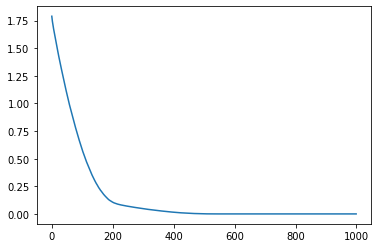

In [14]:
plt.plot(hist.history['loss'])
plt.show()

In [17]:
model.predict(np.array([0]))
model.predict([0])

array([[0.32047656]], dtype=float32)

In [18]:
model.predict(np.array([0.01]))

array([[0.33848438]], dtype=float32)

In [19]:
model.save("model/after_learning.h5") #잘나온거 저장

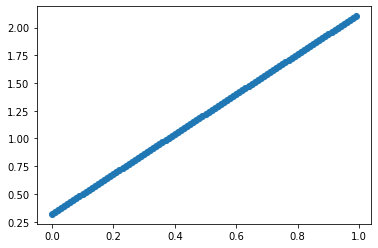

In [20]:
plt.scatter(x=scaled_data_C,y=scaled_data_F)

In [21]:
### 2.1노이가 없는 데이터(위에꺼)

## 1.3 노이즈가 있는 데이터로 실습

In [25]:
#평균이 0이고 표준면차가 0.1인 데이터 100
np.random.seed(707)
noise=np.array(np.random.normal(0,0.1,100))
noised_scaled_data_F=noise+scaled_data_F

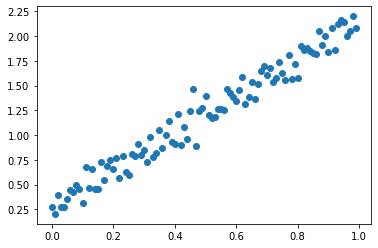

In [26]:
plt.scatter(x=scaled_data_C,y=noised_scaled_data_F)

In [32]:
# 3.모델 구성
model2=Sequential()
model2.add(Dense(1,input_dim=1))
# 4.학습 과정 설정
model2.compile(loss="mse",optimizer="rmsprop",metrics=["mae"])
                #손실함수        옵티마이저,          평가지표
print(model2.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
# 5.학습시키기
hist2=model2.fit(scaled_data_C,noised_scaled_data_F,epochs=1000,verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 0.2859 - mae: 0.5070
Epoch 2/1000
4/4 - 0s - loss: 0.2739 - mae: 0.4955
Epoch 3/1000
4/4 - 0s - loss: 0.2662 - mae: 0.4881
Epoch 4/1000
4/4 - 0s - loss: 0.2590 - mae: 0.4811
Epoch 5/1000
4/4 - 0s - loss: 0.2521 - mae: 0.4741
Epoch 6/1000
4/4 - 0s - loss: 0.2464 - mae: 0.4683
Epoch 7/1000
4/4 - 0s - loss: 0.2403 - mae: 0.4622
Epoch 8/1000
4/4 - 0s - loss: 0.2343 - mae: 0.4560
Epoch 9/1000
4/4 - 0s - loss: 0.2283 - mae: 0.4497
Epoch 10/1000
4/4 - 0s - loss: 0.2228 - mae: 0.4439
Epoch 11/1000
4/4 - 0s - loss: 0.2174 - mae: 0.4381
Epoch 12/1000
4/4 - 0s - loss: 0.2121 - mae: 0.4323
Epoch 13/1000
4/4 - 0s - loss: 0.2070 - mae: 0.4266
Epoch 14/1000
4/4 - 0s - loss: 0.2024 - mae: 0.4215
Epoch 15/1000
4/4 - 0s - loss: 0.1972 - mae: 0.4155
Epoch 16/1000
4/4 - 0s - loss: 0.1922 - mae: 0.4099
Epoch 17/1000
4/4 - 0s - loss: 0.1872 - mae: 0.4040
Epoch 18/1000
4/4 - 0s - loss: 0.1822 - mae: 0.3982
Epoch 19/1000
4/4 - 0s - loss: 0.1772 - mae: 0.3921
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0888
Epoch 159/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0887
Epoch 160/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0885
Epoch 161/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0886
Epoch 162/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0888
Epoch 163/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0886
Epoch 164/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0887
Epoch 165/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0888
Epoch 166/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0887
Epoch 167/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0884
Epoch 168/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0883
Epoch 169/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0883
Epoch 170/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0881
Epoch 171/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0881
Epoch 172/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0880
Epoch 173/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0881
Epoch 174/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0882
Epoch 175/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0880
Epoch 176/1000
4/4 - 0s - loss: 0.0111 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 314/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 315/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 316/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 317/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881
Epoch 318/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 319/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 320/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 321/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 322/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 323/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 324/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 325/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 326/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 327/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 328/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 329/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 330/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 331/1000
4/4 - 0s - loss: 0.0110 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 469/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 470/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 471/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 472/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 473/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 474/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 475/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 476/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 477/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 478/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 479/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 480/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 481/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0876
Epoch 482/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 483/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 484/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 485/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 486/1000
4/4 - 0s - loss: 0.0110 - mae: 

Epoch 623/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 624/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 625/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 626/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 627/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 628/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 629/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 630/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 631/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 632/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 633/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 634/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 635/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 636/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 637/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 638/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 639/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 640/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 641/1000
4/4 - 0s - loss: 0.0110 - mae: 

Epoch 778/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 779/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 780/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 781/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 782/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 783/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0876
Epoch 784/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 785/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 786/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 787/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 788/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 789/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 790/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 791/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 792/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 793/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 794/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 795/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 796/1000
4/4 - 0s - loss: 0.0109 - mae: 

Epoch 933/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 934/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 935/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 936/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 937/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 938/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 939/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 940/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 941/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0878
Epoch 942/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 943/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 944/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 945/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 946/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0878
Epoch 947/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 948/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 949/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 950/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 951/1000
4/4 - 0s - loss: 0.0110 - mae: 

In [36]:
model2.predict(np.array([0.01]))

array([[0.29744378]], dtype=float32)

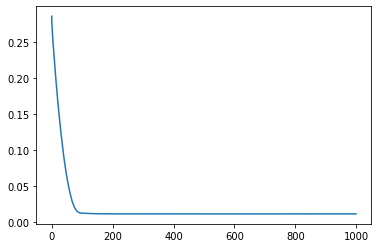

In [37]:
plt.plot(hist2.history["loss"])

In [38]:
model2.save("model.noise_after_learning.h5")